# **クラスタリング演習**

 **１．課題把握とゴールの設定**

**課題**

・カリフォルニアで飲食店の新ビジネスを立ち上げたい

・カリフォルニアの住宅データがあるので、それをもとに何かヒントを得たい

**ゴール**

・カリフォルニアの住宅データをクラスタリングして、飲食店ビジネスに役立ちそうな知見を見いだす

**２．必要なライブラリのインポート**

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=4637434d48b243528e194a4cb897ba3e6e70b591a45d4364f34f53ca8cf14817
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


**３．データセットの準備**

In [3]:
df = pd.read_csv('/content/california_housing_cleansing.csv')
df.head()

,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,8,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,15,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,18,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [4]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [5]:
df.shape

(18572, 8)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
X = df.to_numpy()
scaler.fit(X)

StandardScaler()

In [9]:
X_scaled = scaler.transform(X)
X_scaled

array([[ 2.95027401,  1.22609842, -0.98751408, ...,  2.745577  ,
         0.7095734 ,  0.01067288],
       [ 2.9351148 , -0.5234521 ,  0.80023789, ...,  1.76319575,
         0.90892516,  0.25820709],
       [-1.02729904,  1.31357595, -0.22735403, ...,  0.38723561,
         0.16225546,  0.6325512 ],
       ...,
       [-1.26959164, -0.87336221, -0.39847603, ..., -1.01586791,
         0.26894728,  0.344762  ],
       [-1.163095  , -0.78588468, -0.62721197, ..., -1.09521007,
         0.51108372,  0.63480794],
       [-0.83099363, -0.96083973, -0.0717104 , ..., -1.04614321,
         0.06368403,  0.19008646]])

**４．データセットのクラスタリング**

In [10]:
from sklearn.cluster import KMeans

In [11]:
#クラスター数を８に指定
odel = KMeans(n_clusters=8, random_state=0)

In [12]:
model.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=0)

In [13]:
model.labels_

array([6, 6, 3, ..., 3, 3, 3], dtype=int32)

In [14]:
df['クラスター'] = model.labels_
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人,クラスター
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621,6
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641,6
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410,3
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026,3
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596,3


# **クラスタリングに対する考察**

**クラスター別のデータ数の確認**

<Axes: xlabel='クラスター', ylabel='count'>

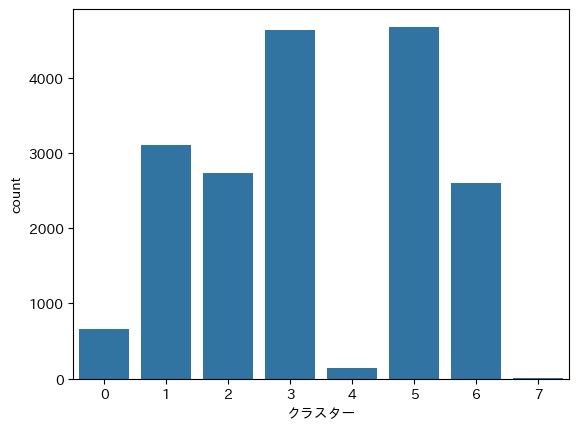

In [15]:
sns.countplot(x='クラスター', data=df)

**クラスター別の平均値の比較**

In [20]:
cluster_mean = df.groupby('クラスター').mean()
cluster_mean

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
クラスター,,,,,,,,
0,4.006855,14.753404,5571.198185,35.022526,-118.921452,1.927101,1.733657,0.347552
1,3.305927,16.422001,1615.302670,33.963693,-117.792113,1.539820,1.891085,0.418073
2,5.529171,27.206442,1251.124451,33.867482,-118.127394,3.144966,2.229849,0.397016
3,2.784794,27.154195,1155.815398,38.183735,-121.502075,1.199911,1.921390,0.407700
4,3.638826,17.295775,560.619718,36.612535,-118.753028,1.601127,7.850414,1.620028
5,2.912084,36.294080,1323.809147,34.021921,-118.107016,1.566049,1.432466,0.329524
6,5.185207,26.006934,1367.884052,37.637716,-122.002042,2.857656,2.197256,0.393803
7,2.667063,19.000000,79.625000,38.467500,-119.951875,1.462312,25.975253,5.837735


所得の平均値が最も低いのは、クラスター７(≒2.66)であるが、データ数が少ない。

次に所得の平均値が低いのはクラスター３(≒2.78)であり、データ数も揃っているようにみえる。

さらに住宅価格は≒1.19と最も低い。

クラスター３は所得が低いと考えて深堀してみる。

**各クラスターと緯度経度の関係の確認**

<Axes: xlabel='経度', ylabel='緯度'>

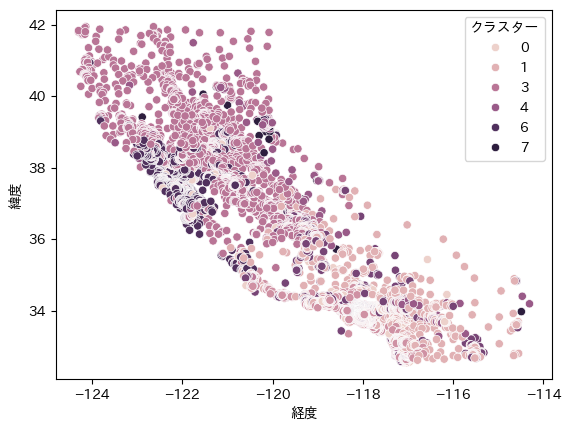

In [27]:
sns.scatterplot(x='経度', y='緯度', hue='クラスター', data=df)

**特定のクラスターに的を絞った深堀**

<Axes: xlabel='経度', ylabel='緯度'>

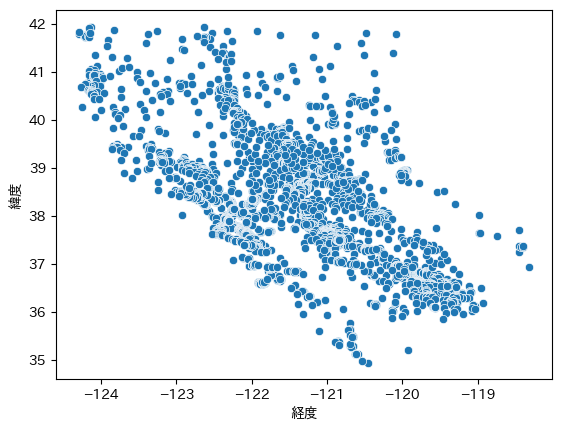

In [26]:
#所得が低めと思われるクラスター３に絞って、緯度と経度でマッピングする。
df_cluster3 = df.query('クラスター == 3')
sns.scatterplot(x='経度', y='緯度', data=df_cluster3)

なんかいっぱいある。


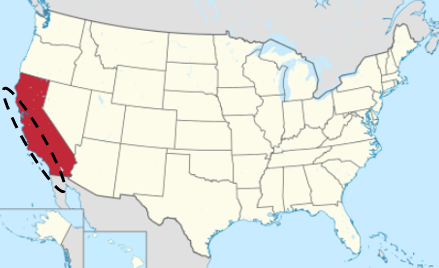

In [31]:
from PIL import Image
california_map = Image.open('/content/california_map.png')
california_map

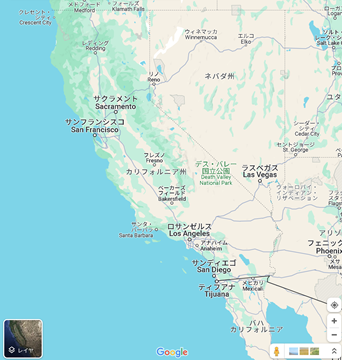

In [53]:
california_google = Image.open('/content/california_google.png')
california_google

クラスター３はカリフォルニア全体の経度左半分にあるようだ。

カリフォルニア全体の地域人口をグラフ化する。

<Axes: xlabel='地域人口', ylabel='Count'>

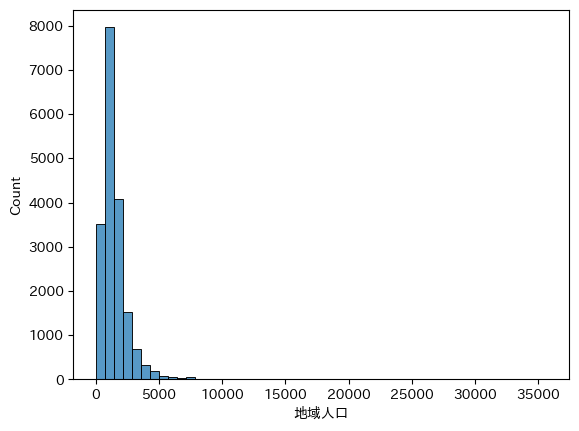

In [32]:
sns.histplot(x='地域人口', data=df, bins=50)

In [ ]:
カリフォルニアの5000名を超えるデータが点在しているようだ。
クラスター３を緯度と経度でマッピングしてみる。

<Axes: >

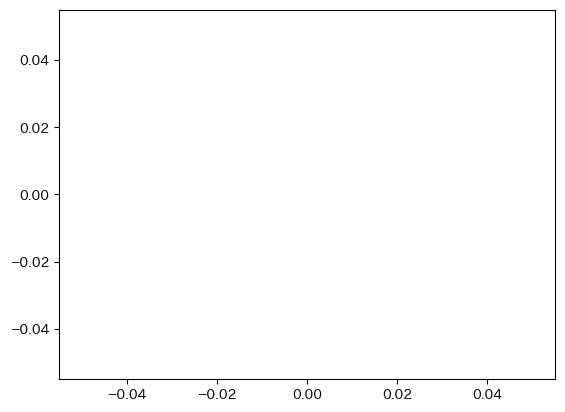

In [33]:
sns.scatterplot(x='経度', y='緯度', data=df_cluster3.query('地域人口 > 5000'))

なくなってしまった。

ので3000名を超えるクラスター３をマッピングしてみる。

<Axes: xlabel='経度', ylabel='緯度'>

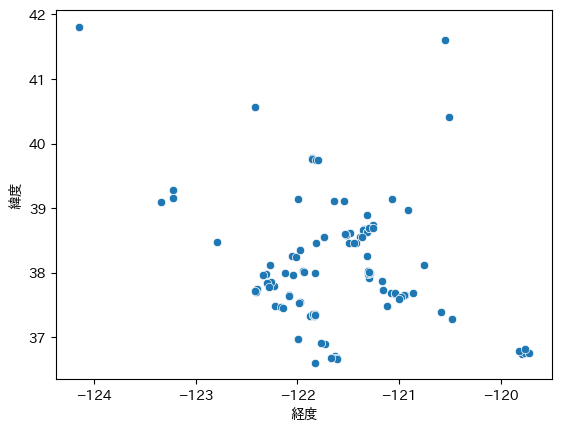

In [45]:
sns.scatterplot(x='経度', y='緯度', data=df_cluster3.query('地域人口 > 3000'))

3つほどのエリアにポイントが集中しているように見える。

経度-122°緯度38°,経度-121°緯度39°,経度-121°緯度38度

地図上で見るとサンフランシスコに相当する。

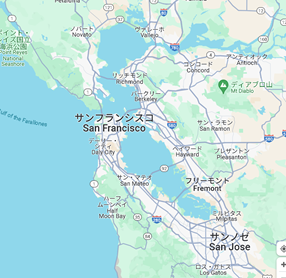

In [54]:
sanfrancisco_google = Image.open('/content/sanfrancisco_google.png')
sanfrancisco_google

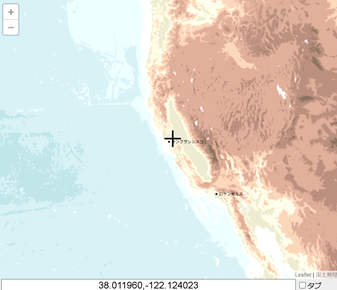

In [55]:
sanfrancisco_keidoido = Image.open('/content/sanfrancisco_keidoido.png')
sanfrancisco_keidoido

サンフランシスコって結構な都市のイメージだけど所得の平均が低いってどういうことなのか。

なんかおかしいので見直してみるとこのcalifornia_housing_cleansingの元のデータセットはthis dataset was drived from the 1990 u.s.なので1990年のもの。
wikipediaによると1989年にロマ・プリータ地震がおきて再建に転じている時期にあるデータとみれる。

だから所得や住宅価格が低く出たのか……？

**５．考察結果**

**課題**

カリフォルニアの住宅価格データをクラスタリングして、飲食店ビジネスに役立ちそうな知見を見いだす

**見解・意見**

・1990年の南東には低所得者が居住している可能性が示唆される。

・地域人口が3000名を超え、さらに所得が低いと推測できるエリアは1990年のサンフランシスコ周辺であるようだ。

・この時期のサンフランシスコは震災による再建に奮起している時期であるため、1990年のサンフランシスコで労働者や居住者が手軽に食べられる飲食店を展開する計画が１つの案として推奨される。